In [144]:
library("car")
library("MASS")

In [1]:
q1 <- read.table(
  "finaltr1.dat",
  header = F,
  as.is = T,
  col.names = c('a', 'b', 'c', 'response')
)
c = ncol(q1)
r = nrow(q1)

head(q1)

a,b,c,response
1.455183,-1.582413,-0.79986699,-1.19644881450559
5.611342,-1.623126,-0.02688283,-0.768555417215431
1.273810,-1.550128,0.29150806,-0.230361659426824
1.307202,-2.694407,-0.68601789,-1.16303941768924
4.300929,-1.154743,-0.39088466,-1.0131776860767
1.742520,-2.284435,0.74478268,1.90115049535415


In [2]:
train = q1[1:100,]
train$response = as.numeric(train$response)
test_x = q1[101:nrow(q1),][,c("a","b","c")]
test_y = read.table("finalprq1.dat", header = F, as.is = T, col.names = c('response'))

tail(train)
head(test_x)
head(test_y)

,a,b,c,response
95,1.105754,-1.657824,-0.80571028,-1.0608188
96,2.129337,-2.083347,0.76122157,2.0030739
97,3.607869,-1.272318,0.82529508,2.2856915
98,2.664642,-2.438818,-0.46545227,-1.1249455
99,1.033070,-1.512141,-0.18543966,-0.9702493
100,1.424522,-1.655860,-0.07311719,-0.9193153


,a,b,c
101,1.725541,-1.053257,0.3883433
102,1.787613,-1.736316,-0.9541755
103,1.658986,-3.031713,-0.3953767
104,4.408264,-1.004072,0.4066485
105,1.100892,-1.433089,0.9974857
106,1.253575,-1.063971,-0.6151925


response
0.3453552
-0.9287183
-1.1055420
0.2575511
3.9184790
-0.9030137


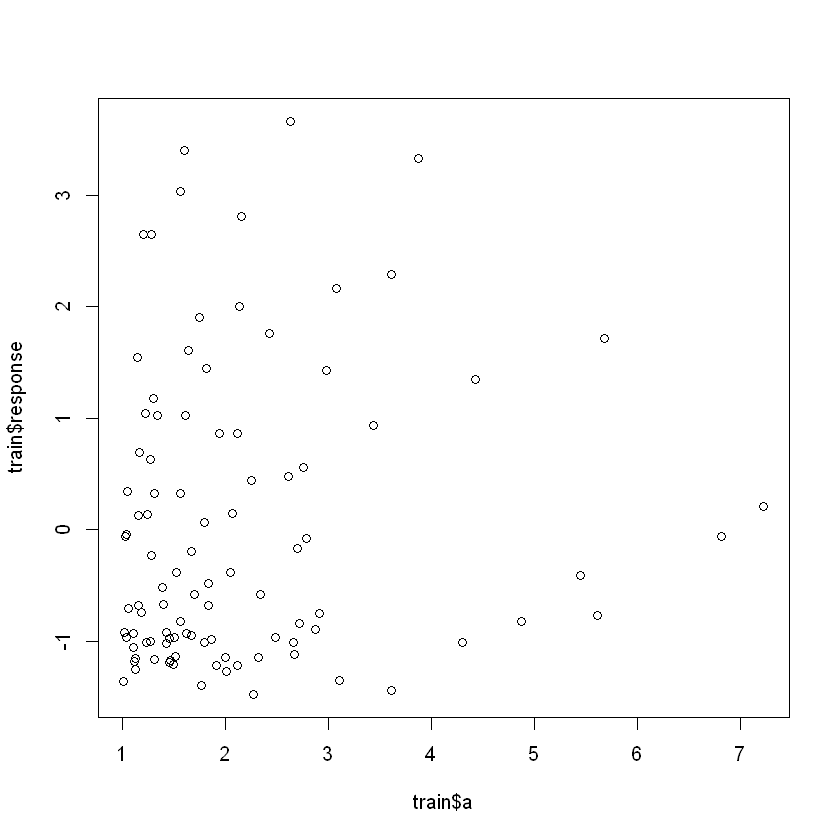

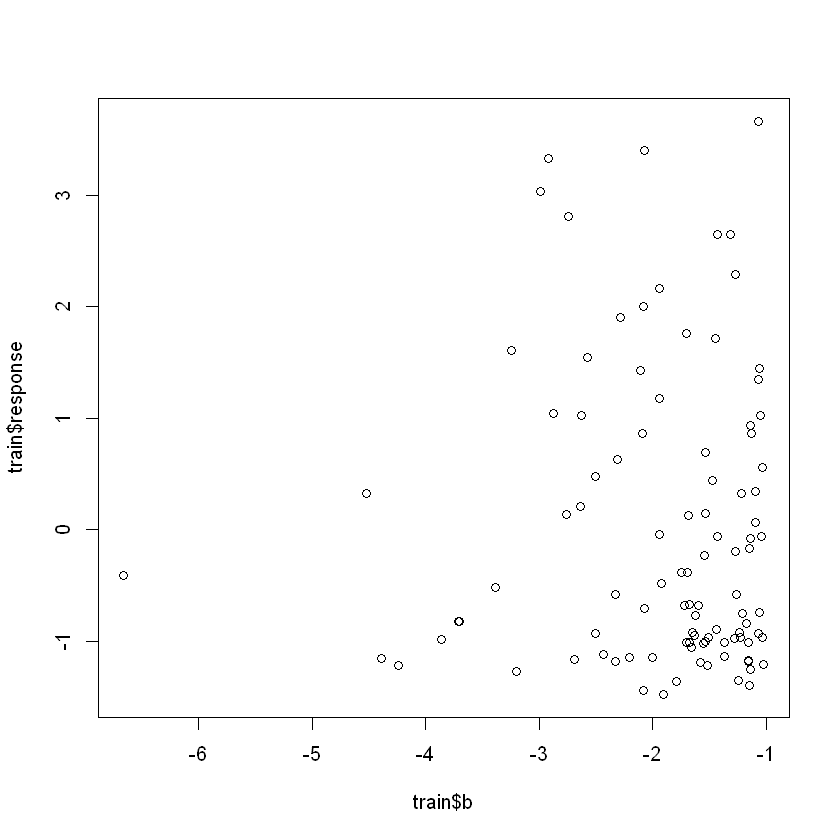

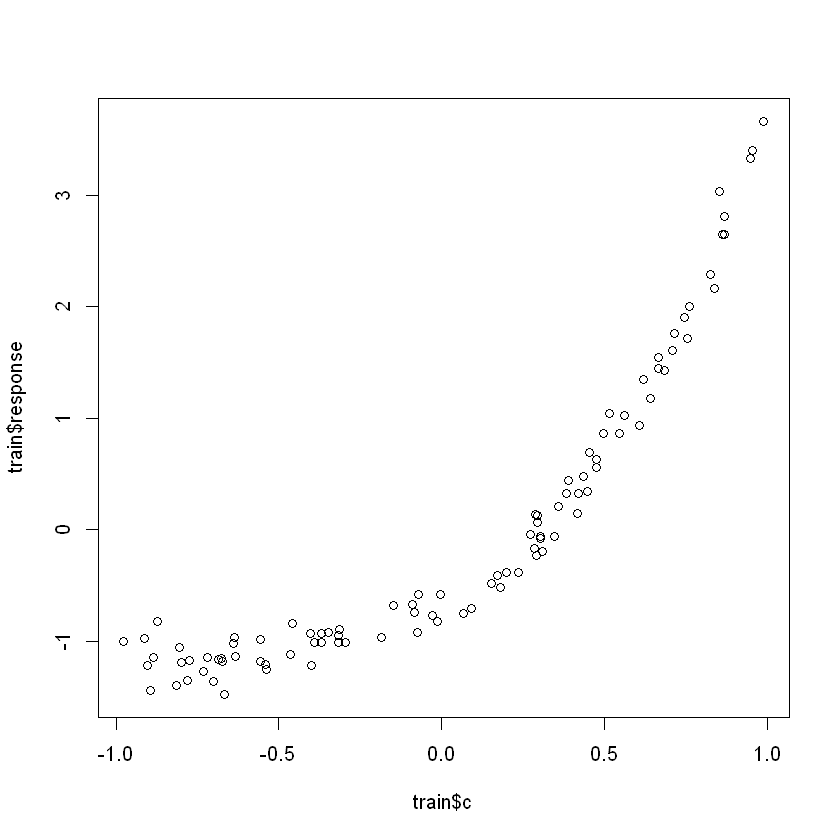

In [50]:
plot(train$a, train$response)
plot(train$b, train$response)
plot(train$c, train$response)


Call:
lm(formula = response ~ a + b + c, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87851 -0.44218 -0.09036  0.35552  1.76216 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.04423    0.16075  -0.275    0.784    
a           -0.04009    0.04827  -0.830    0.408    
b           -0.02742    0.06294  -0.436    0.664    
c            2.04069    0.10470  19.490   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5865 on 96 degrees of freedom
Multiple R-squared:  0.8013,	Adjusted R-squared:  0.7951 
F-statistic:   129 on 3 and 96 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,2.47866189,2.47866189,7.20607357,8.559253e-03
b,1,0.02420428,0.02420428,0.07036775,7.913709e-01
c,1,130.66379470,130.66379470,379.87146318,3.863691e-35
Residuals,96,33.02097027,0.34396844,NA,NA


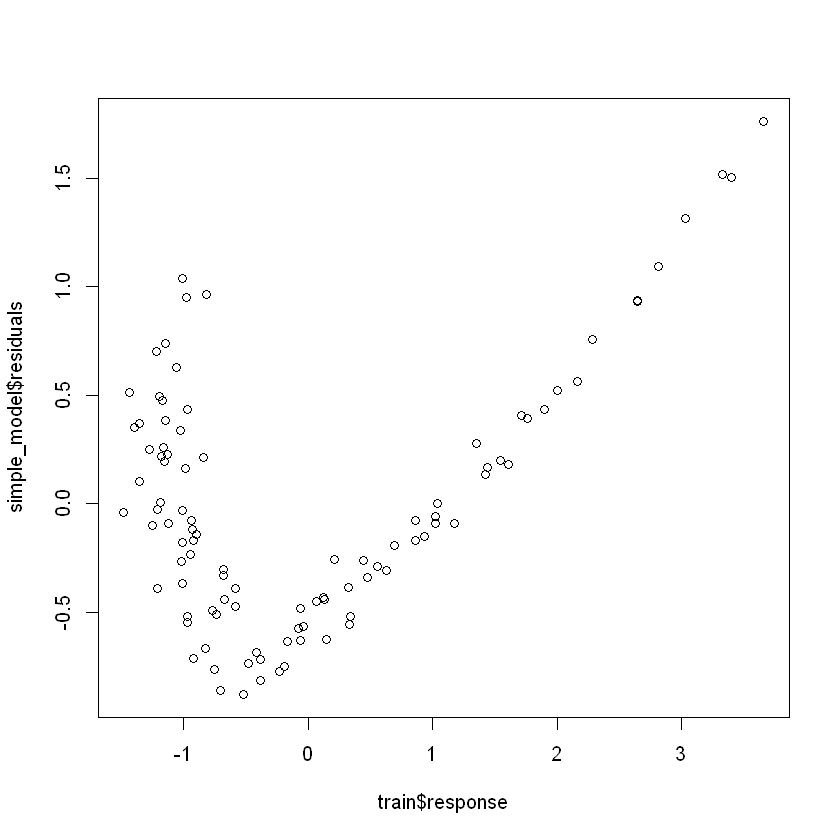

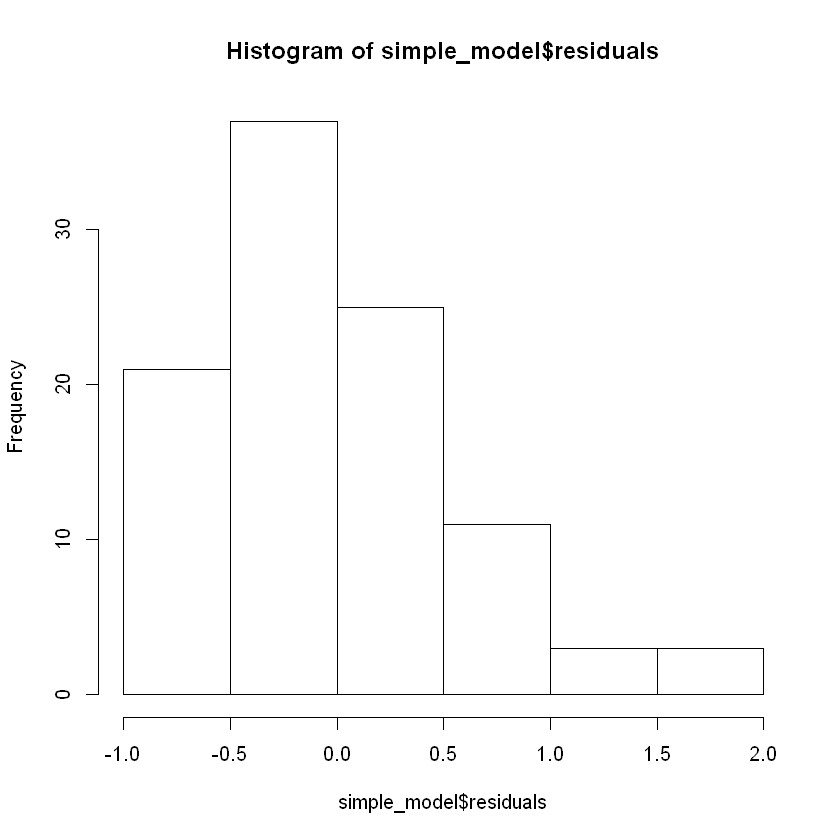

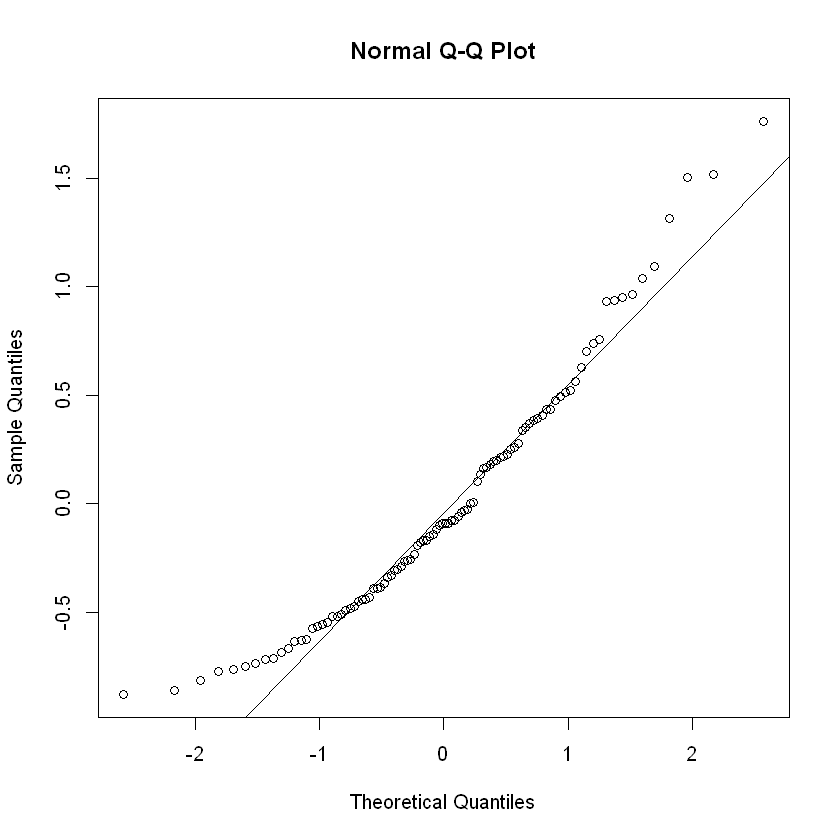

In [61]:
simple_model = lm(response ~ a + b + c, data=train)
summary(simple_model)
anova(simple_model)

# we see that response can be negative, we should shift it
plot(train$response, simple_model$residuals)

# right skewed residuals although still normal mostly
hist(simple_model$residuals)
qqnorm(simple_model$residuals)
qqline(simple_model$residuals)

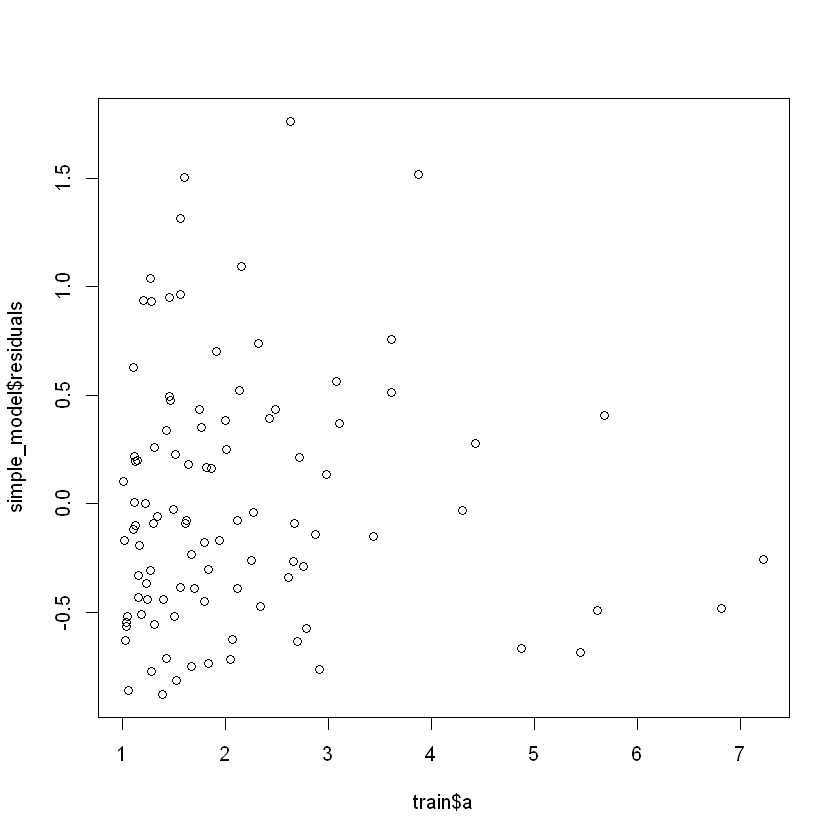

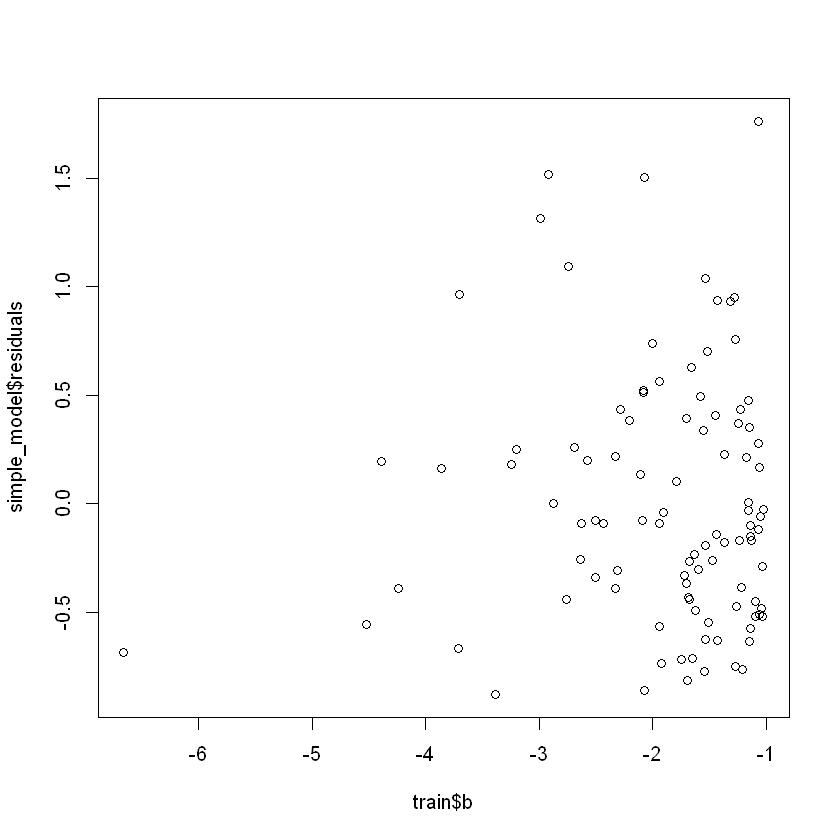

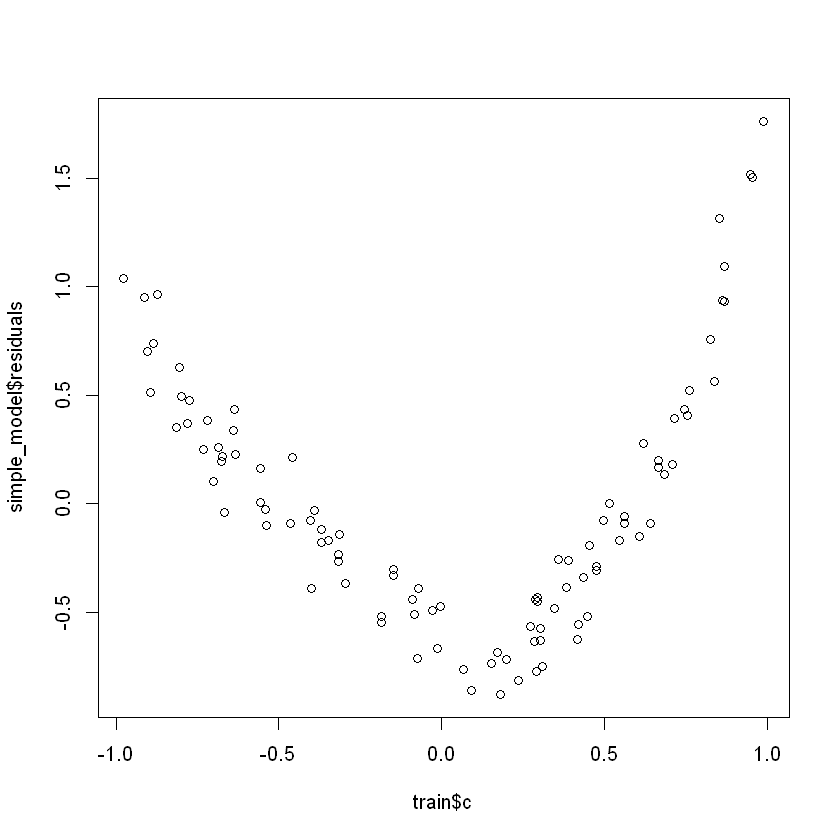

In [59]:
plot(train$a, simple_model$residuals)
plot(train$b, simple_model$residuals)
plot(train$c, simple_model$residuals)

In [7]:
# we add 10^(-5) because we need every value to be positive, not just 0
response_shift = abs(min(train$response)) + 10e-5
train$shifted_response = train$response + response_shift

,a,b,c,response,shifted_response
a,1.00000000,-0.09974212,0.17618836,0.12212633,0.12212633
b,-0.09974212,1.00000000,-0.00901372,-0.02418928,-0.02418928
c,0.17618836,-0.00901372,1.00000000,0.89421214,0.89421214
response,0.12212633,-0.02418928,0.89421214,1.00000000,1.00000000
shifted_response,0.12212633,-0.02418928,0.89421214,1.00000000,1.00000000


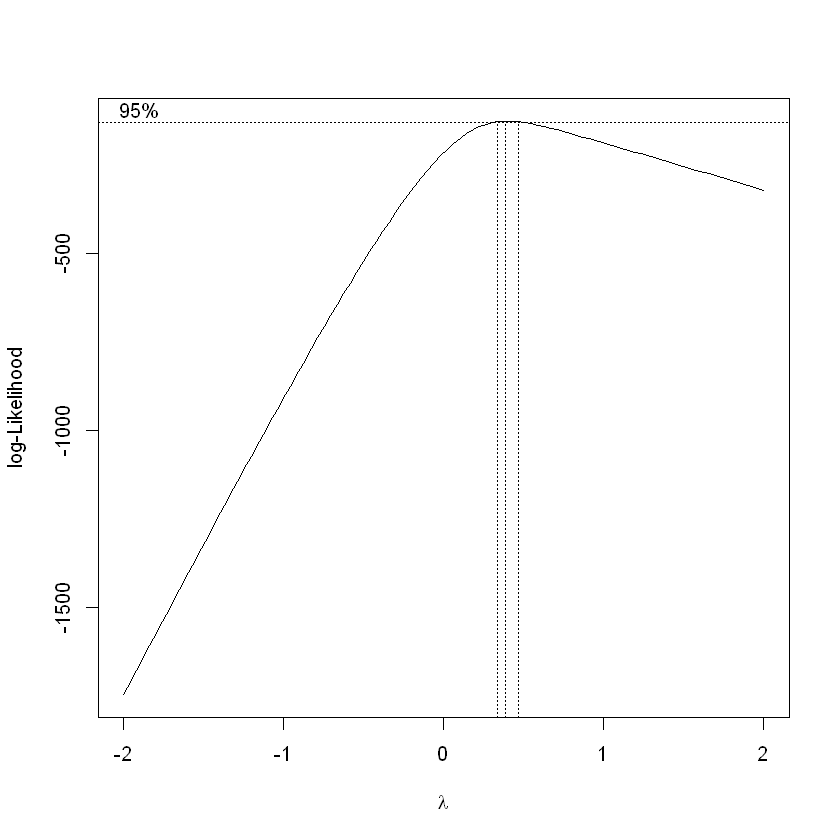

In [145]:
# looks like lambda \approx 0.4
# aka perform sqrt transformation
boxcox(shifted_response ~ a + b + c, data=train)

# some correlation between a and c
# c holds the most correlation towards our response variable...
cor(train)

In [56]:
model2 = lm(sqrt(shifted_response) ~ a + b + c, data=train)
# model2 = lm(sqrt(train$shifted_response) ~ train$a + train$b + train$c)
summary(model2)
anova(model2)


Call:
lm(formula = sqrt(shifted_response) ~ a + b + c, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47279 -0.12352 -0.01343  0.11484  0.48119 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.086134   0.048283  22.495   <2e-16 ***
a           -0.017757   0.014499  -1.225    0.224    
b           -0.009224   0.018905  -0.488    0.627    
c            0.871703   0.031449  27.718   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1762 on 96 degrees of freedom
Multiple R-squared:  0.8907,	Adjusted R-squared:  0.8873 
F-statistic: 260.8 on 3 and 96 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,0.438700563,0.438700563,14.13703749,2.920839e-04
b,1,0.001873145,0.001873145,0.06036172,8.064496e-01
c,1,23.841708168,23.841708168,768.29425432,1.330300e-47
Residuals,96,2.979072108,0.031032001,NA,NA


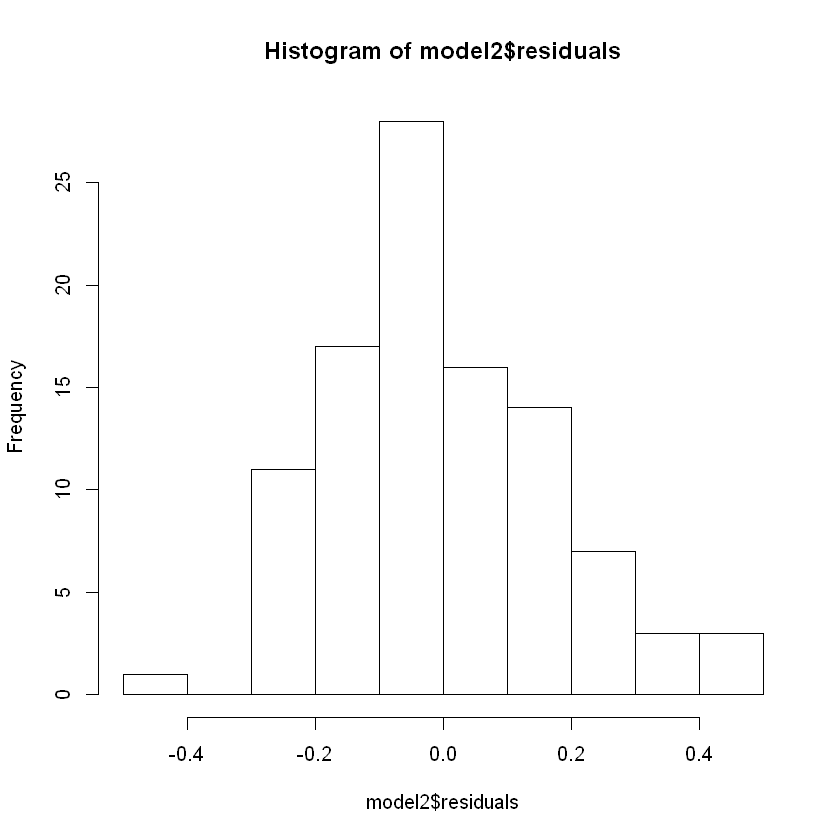

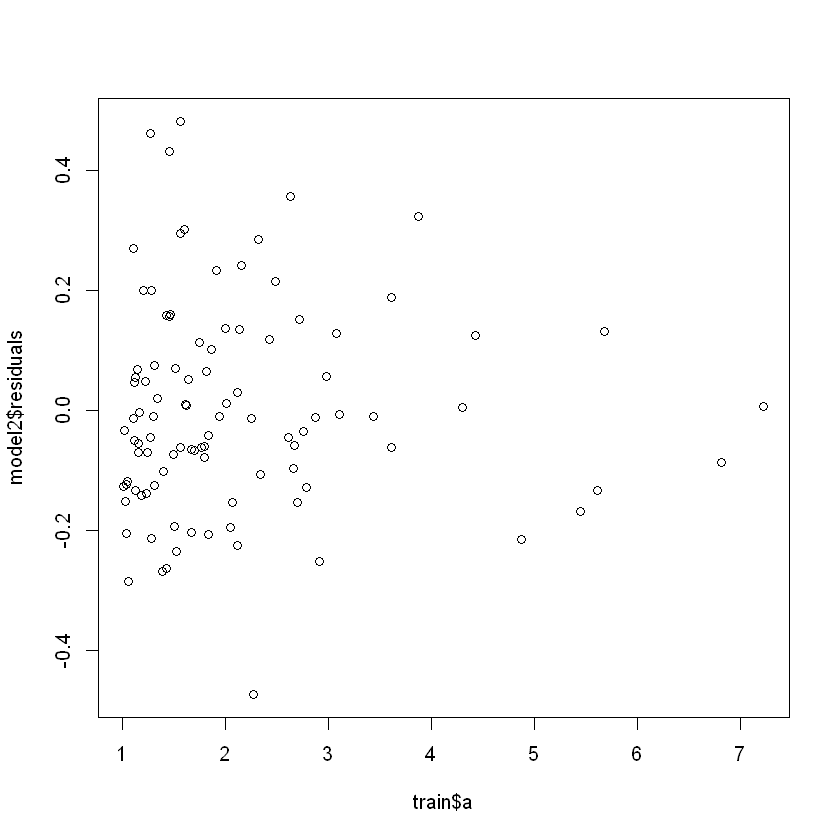

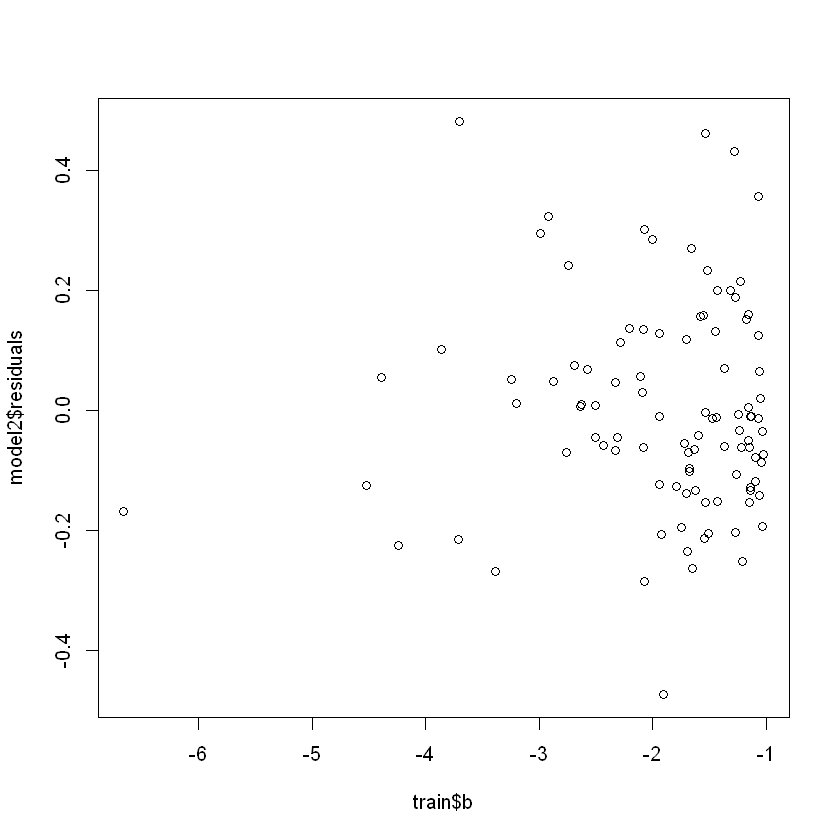

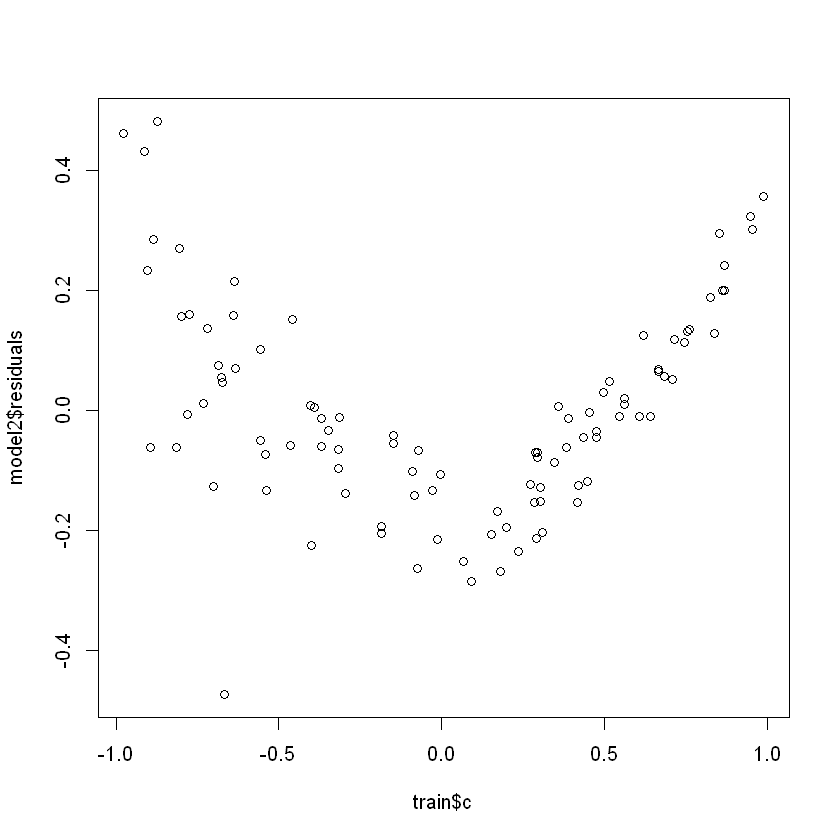

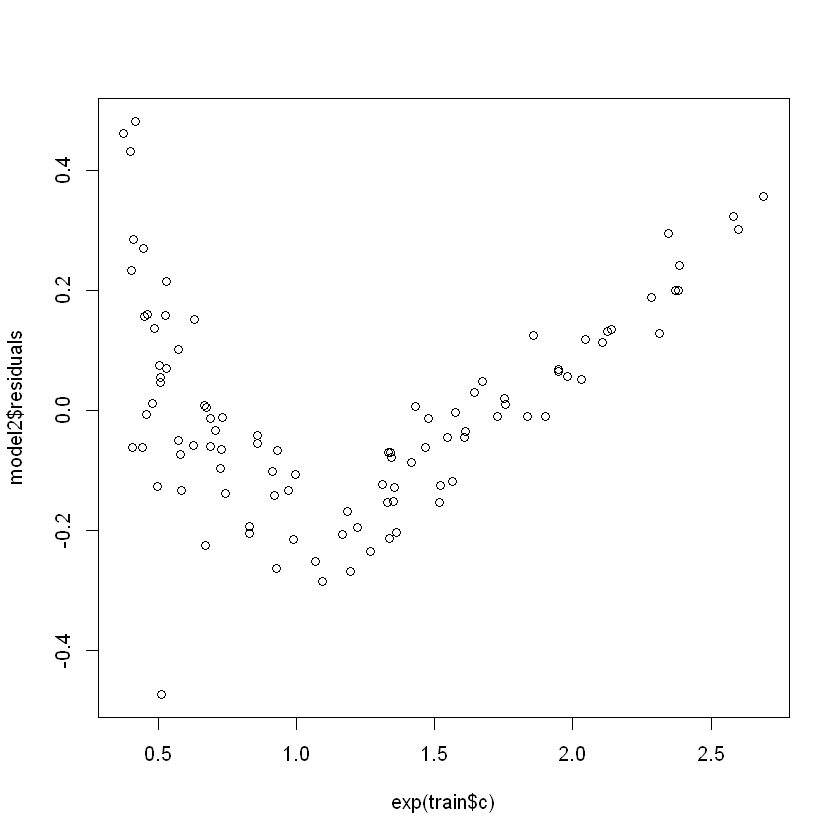

In [57]:
# much better normality
hist(model2$residuals, breaks=10)

# however, not nearly constant variance still
plot(train$a, model2$residuals)
plot(train$b, model2$residuals)
plot(train$c, model2$residuals)
plot(exp(train$c), model2$residuals)

In [60]:
# we take the prediction values and square them since we did a sqrt transform
# then we add the minimum shift back and subtract our epsilon from before
predict_test = (predict(model2, test_x) ** 2) - response_shift

# now we compare between our initial model and the new model
sum((predict_test - test_y)**2)
sum((predict(simple_model, test_x) - test_y)**2)

[1] 7.972371

[1] 19.0466

In [49]:
data.frame("predicted"=predict_test, "real"=test_y$response)

,predicted,real
101,0.4888991,0.34535520
102,-1.4245995,-0.92871830
103,-0.9339701,-1.10554200
104,0.3997136,0.25755110
105,2.3182753,3.91847900
106,-1.1927296,-0.90301370
107,1.4188598,1.68577600
108,-0.9779887,-0.87389940
109,-1.0854578,-1.05020400
110,-0.6424778,-0.77632390


In [72]:
model3 = lm(sqrt(shifted_response) ~ a + c, data=train)
summary(model3)
anova(model3)


Call:
lm(formula = sqrt(shifted_response) ~ a + c, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47305 -0.12293 -0.01923  0.11650  0.49798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.10231    0.03497  31.526   <2e-16 ***
a           -0.01705    0.01437  -1.187    0.238    
c            0.87157    0.03132  27.824   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1755 on 97 degrees of freedom
Multiple R-squared:  0.8905,	Adjusted R-squared:  0.8882 
F-statistic: 394.2 on 2 and 97 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
a,1,0.4387006,0.43870056,14.24896,2.759136e-04
c,1,23.8361938,23.83619384,774.19792,4.957722e-48
Residuals,97,2.9864596,0.03078824,NA,NA


In [101]:
predict_test_model3 = (predict(model3, test_x) ** 2) - response_shift
sum((predict_test_model3 - test_y)**2)

[1] 7.926676

In [150]:
model4 = lm(sqrt(shifted_response) ~ exp(c) + a*c, data=train)
anova(model4)
Anova(model4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
exp(c),1,26.12280010,26.12280010,2370.021248,5.632224e-69
a,1,0.03492462,0.03492462,3.168577,7.826512e-02
c,1,0.02886211,0.02886211,2.618548,1.089366e-01
a:c,1,0.02766008,0.02766008,2.509492,1.164858e-01
Residuals,95,1.04710707,0.01102218,NA,NA


,Sum Sq,Df,F value,Pr(>F)
exp(c),1.76016965,1,159.693427,4.641996e-22
a,0.03076151,1,2.790874,9.809406e-02
c,0.02886211,1,2.618548,1.089366e-01
a:c,0.02766008,1,2.509492,1.164858e-01
Residuals,1.04710707,95,NA,NA


In [143]:
predict_test_model4 = (predict(model4, test_x) ** 2) - response_shift

# SSE
sum((predict_test_model4 - test_y)^2)

# MSE of test
mean(((predict_test_model4 - test_y)^2)$response)
# MSE of model (residuals) against training
anova(model4)["Mean Sq"][5,1]

[1] 1.340141

[1] 0.02680282

[1] 0.01102218

In [146]:
data.frame("predicted"=predict_test_model4, "real"=test_y$response)

,predicted,real
101,0.21046637,0.34535520
102,-1.25701227,-0.92871830
103,-1.02647775,-1.10554200
104,0.21026714,0.25755110
105,3.95504957,3.91847900
106,-1.12422147,-0.90301370
107,1.73279892,1.68577600
108,-1.04059451,-0.87389940
109,-1.08597553,-1.05020400
110,-0.84409161,-0.77632390


In [181]:
write.table(predict_test_model4, file="PR1_submit.dat", col.names = F, row.names = F)